<a href="https://colab.research.google.com/github/Alex-Jung-HB/0805_python_Carla-Radar-Lidar-/blob/main/0805_python_Carla(Radar_Lidar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

실습 1: Lidar와 Radar 데이터 시각화

=== Day 2: Autonomous Driving Sensor Data Processing Lab ===

📊 Lab 1: Lidar and Radar Data Visualization
목표: Lidar 포인트 클라우드와 Radar 탐지 객체를 2D 평면에 시각화
------------------------------------------------------------
✅ Lidar 데이터 로드 완료: (41, 4) (41개 포인트)
✅ Radar 데이터 로드 완료: (3, 4) (3개 탐지 객체)

🔧 작업 1: 센서 데이터 시각화 중...
   📍 Lidar: 41개 포인트를 X-Y 평면에 표시
   🎯 Radar: 3개 탐지 객체를 극좌표에서 직교좌표로 변환하여 표시


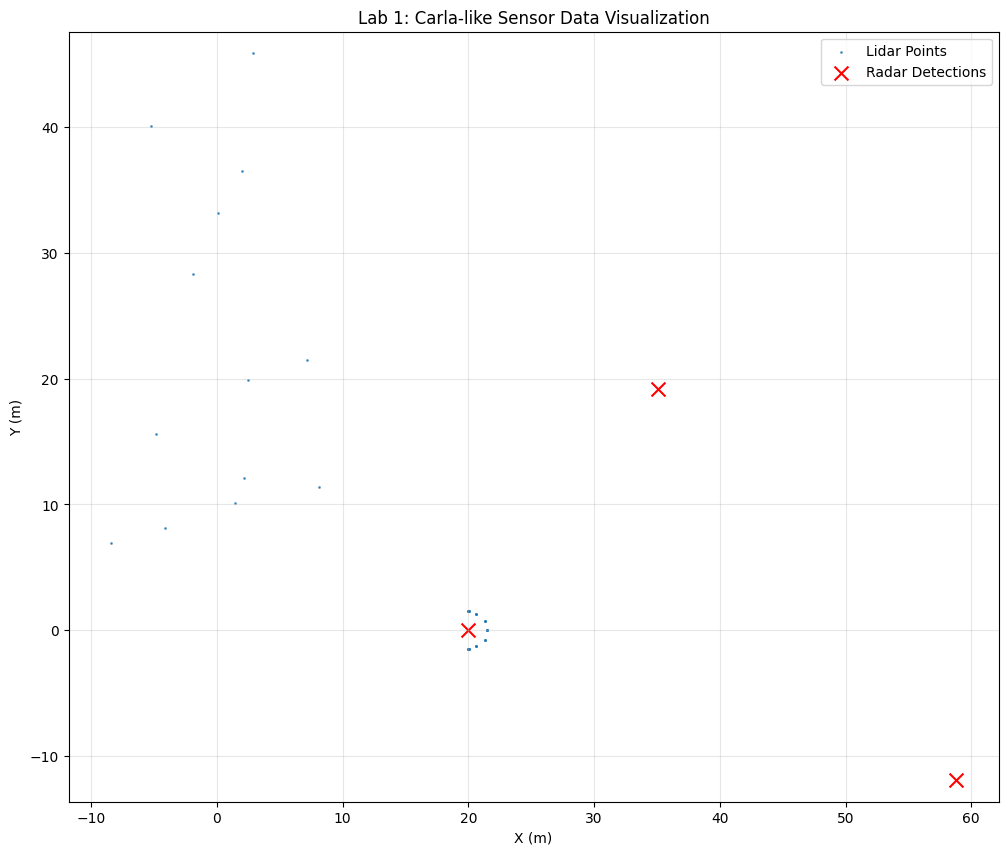

✅ Lab 1 완료: Lidar와 Radar 데이터 시각화 성공


In [3]:
# Day 2: 자율주행을 위한 데이터 처리 실습 (Autonomous Driving Data Processing Lab)

"""
과정 목표 (Course Objectives):
1. Lidar와 Radar 센서 데이터의 근본적인 차이점을 시각적으로 이해합니다.
2. Python 표준 라이브러리와 NumPy, Matplotlib만을 사용하여 기본적인 센서 데이터 처리 기법을 익힙니다.
3. 실제 Carla 시뮬레이터에서 사용하는 데이터 형식을 다루며, 오프라인 개발 워크플로우를 체험합니다.
"""

# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import io

print("=== Day 2: Autonomous Driving Sensor Data Processing Lab ===\n")

# ============================================================================
# 실습 1: Lidar와 Radar 데이터 시각화
# ============================================================================

print("📊 Lab 1: Lidar and Radar Data Visualization")
print("목표: Lidar 포인트 클라우드와 Radar 탐지 객체를 2D 평면에 시각화")
print("-" * 60)

# 데이터 준비
# Lidar 데이터: (x, y, z, intensity) 형식
# - 지면 포인트와 원통형 장애물 포인트가 포함됨
lidar_csv_data = """-4.8328,15.6338,-1.5111,0.3012
2.0195,36.4988,-1.5019,0.2289
20.0226,1.4996,-0.5000,0.9000
2.8361,45.8679,-1.4883,0.2917
21.4981,0.0000,0.5000,0.9000
-1.9213,28.2974,-1.5032,0.3164
20.0000,1.5000,1.5000,0.9000
7.1947,21.5238,-1.5011,0.2887
20.0226,-1.4996,-0.5000,0.9000
-8.4331,6.9383,-1.4912,0.3814
21.4981,0.0000,-0.5000,0.9000
2.4782,19.9128,-1.4978,0.3342
20.0000,-1.5000,0.5000,0.9000
20.0000,1.5000,-0.5000,0.9000
21.2941,0.7500,1.5000,0.9000
21.2941,-0.7500,-0.5000,0.9000
20.0000,-1.5000,1.5000,0.9000
21.2941,0.7500,-0.5000,0.9000
21.2941,-0.7500,0.5000,0.9000
-5.2281,40.1181,-1.5321,0.3412
0.1123,33.1823,-1.4812,0.2141
8.1241,11.4124,-1.5124,0.3124
20.5878,-1.2990,0.5000,0.9000
20.5878,1.2990,1.5000,0.9000
20.5878,-1.2990,-0.5000,0.9000
20.5878,1.2990,-0.5000,0.9000
20.5878,1.2990,0.5000,0.9000
20.0000,-1.5000,-0.5000,0.9000
21.4981,0.0000,1.5000,0.9000
21.2941,-0.7500,1.5000,0.9000
20.0226,1.4996,1.5000,0.9000
20.0226,-1.4996,0.5000,0.9000
20.0226,1.4996,0.5000,0.9000
20.0226,-1.4996,1.5000,0.9000
2.1331,12.1341,-1.5123,0.3123
1.4124,10.1245,-1.5124,0.2412
-4.1234,8.1234,-1.5312,0.3124
20.0000,1.5000,0.5000,0.9000
21.4981,0.0000,0.5000,0.9000
20.5878,-1.2990,1.5000,0.9000
21.2941,0.7500,0.5000,0.9000"""

# Radar 데이터: (velocity, azimuth, altitude, depth) 형식
# - azimuth: 방위각 (라디안)
# - depth: 거리 (미터)
radar_csv_data = """0.0000,0.0000,0.0000,20.0000    # CSV(Comma-Separated Values): simple text file format used to store tabular data
-5.0000,0.5000,0.1000,40.0000
10.0000,-0.2000,-0.1000,60.0000"""

# 데이터 로드
# StringIO creats a text stream that behaves like a file
# loadtxt() expects a file or file-like object
# delimiter=',' tells it that columns are separated by commas
lidar_data = np.loadtxt(io.StringIO(lidar_csv_data), delimiter=',')   # np: NumPy. "Numerical Python"
radar_data = np.loadtxt(io.StringIO(radar_csv_data), delimiter=',')

print(f"✅ Lidar 데이터 로드 완료: {lidar_data.shape} (41개 포인트)")
print(f"✅ Radar 데이터 로드 완료: {radar_data.shape} (3개 탐지 객체)")

# 작업 1: Lidar 및 Radar 데이터 시각화
print("\n🔧 작업 1: 센서 데이터 시각화 중...")

plt.figure(figsize=(12, 10))

# Lidar 시각화
# lidar_data의 구조: [x, y, z, intensity]
# x, y 좌표를 사용하여 2D 평면에 표시
lidar_x = lidar_data[:, 0]  # X 좌표 (0번 열)
lidar_y = lidar_data[:, 1]  # Y 좌표 (1번 열)
plt.scatter(lidar_x, lidar_y, s=1, label='Lidar Points', alpha=0.7)   # s: size of the scatter plot points

print(f"   📍 Lidar: {len(lidar_x)}개 포인트를 X-Y 평면에 표시")

# Radar 시각화
# radar_data의 구조: [velocity, azimuth, altitude, depth]
# 극좌표(depth, azimuth)를 직교좌표(x, y)로 변환
radar_depth = radar_data[:, 3]    # 거리 (3번 열)
radar_azimuth = radar_data[:, 1]  # 방위각 (1번 열, 라디안)

# 극좌표 → 직교좌표 변환 공식
# x = depth * cos(azimuth)
# y = depth * sin(azimuth)
radar_x = radar_depth * np.cos(radar_azimuth)
radar_y = radar_depth * np.sin(radar_azimuth)

plt.scatter(radar_x, radar_y, s=100, c='red', marker='x', label='Radar Detections')

print(f"   🎯 Radar: {len(radar_x)}개 탐지 객체를 극좌표에서 직교좌표로 변환하여 표시")

# 그래프 설정
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Lab 1: Carla-like Sensor Data Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print("✅ Lab 1 완료: Lidar와 Radar 데이터 시각화 성공")


🔍 Lab 2: Lidar Data Filtering and ROI Selection
목표: 지면 제거 및 관심 영역 설정을 통한 데이터 전처리
------------------------------------------------------------
📊 원본 Lidar 포인트: 41개
🧹 지면 제거 (Z > -1.0m): 41 → 28개
🎯 ROI 필터링 (18.0m < X < 22.0m, -2.0m < Y < 2.0m): 28 → 28개


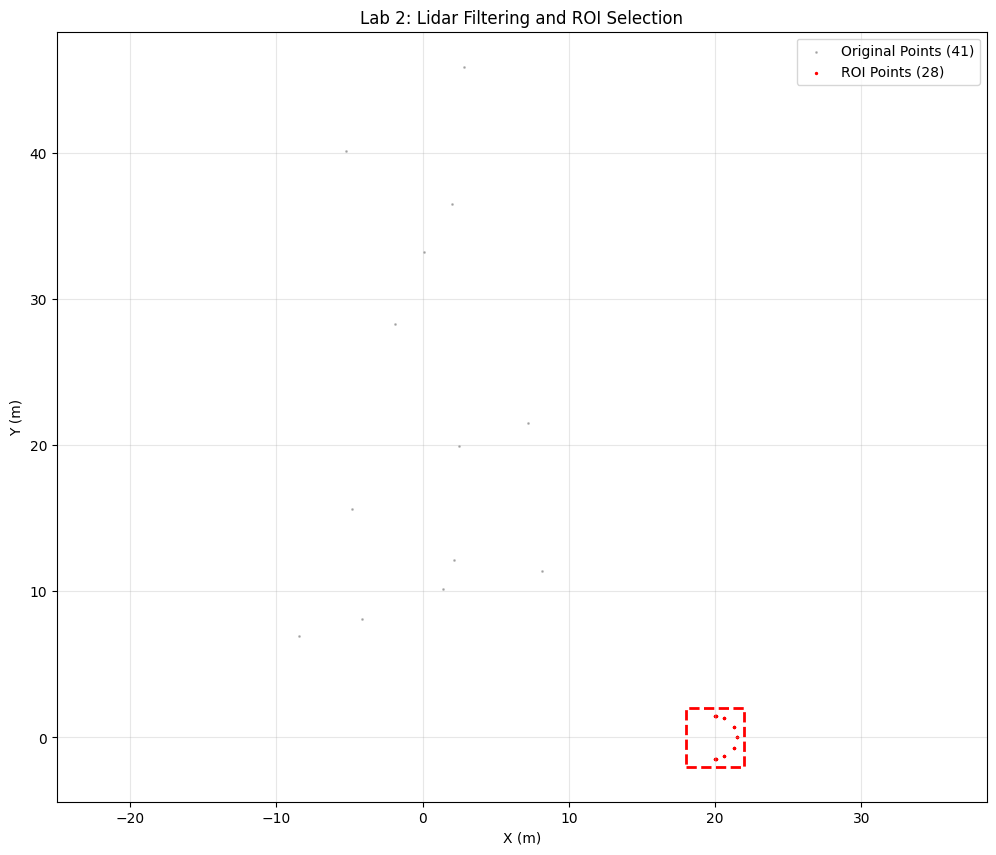

✅ Lab 2 완료: 데이터 필터링 및 ROI 설정 성공


In [4]:
# ============================================================================
# 실습 2: Lidar 데이터 필터링 및 관심 영역(ROI) 설정
# ============================================================================

print("\n" + "="*80)
print("🔍 Lab 2: Lidar Data Filtering and ROI Selection")
print("목표: 지면 제거 및 관심 영역 설정을 통한 데이터 전처리")
print("-" * 60)

plt.figure(figsize=(12, 10))

# 원본 데이터 시각화 (참조용)
plt.scatter(lidar_data[:, 0], lidar_data[:, 1], s=1, c='gray',
           label=f'Original Points ({len(lidar_data)})', alpha=0.5)

print(f"📊 원본 Lidar 포인트: {len(lidar_data)}개")

# 작업 2-1: 지면 제거 필터링
# Z 좌표가 -1.0m보다 높은 포인트만 선택 (지면 제거)
# NumPy boolean indexing to filter out ground points
# lidar_data[:, 2] extracts column 2 (Z-coordinates) from ALL rows using NumPy array slicing.
z_threshold = -1.0
points_no_ground = lidar_data[lidar_data[:, 2] > z_threshold]   # Elemination of z-value in column 2 below z_threshold

print(f"🧹 지면 제거 (Z > {z_threshold}m): {len(lidar_data)} → {len(points_no_ground)}개")

# 작업 2-2: ROI(Region of Interest) 필터링
# 차량 전방 18m ~ 22m, 좌우 2m 영역만 선택
x_min, x_max = 18.0, 22.0  # 전방 거리 범위
y_min, y_max = -2.0, 2.0   # 좌우 범위

# 복합 조건 필터링: AND 연산자(&) 사용
roi_condition = ((points_no_ground[:, 0] > x_min) &
                 (points_no_ground[:, 0] < x_max) &
                 (points_no_ground[:, 1] > y_min) &
                 (points_no_ground[:, 1] < y_max))

roi_points = points_no_ground[roi_condition]

print(f"🎯 ROI 필터링 ({x_min}m < X < {x_max}m, {y_min}m < Y < {y_max}m): "
      f"{len(points_no_ground)} → {len(roi_points)}개")

# 최종 필터링된 포인트 시각화
# roi_points[:, 0], roi_points[:, 1] extracts the X and Y coordinates from the filtered ROI points for 2D plotting.
plt.scatter(roi_points[:, 0], roi_points[:, 1], s=2, c='red',
           label=f'ROI Points ({len(roi_points)})')

# ROI 영역 표시 (시각적 참조)
roi_rect = plt.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min,
                        fill=False, edgecolor='red', linewidth=2, linestyle='--')
plt.gca().add_patch(roi_rect)

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Lab 2: Lidar Filtering and ROI Selection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print("✅ Lab 2 완료: 데이터 필터링 및 ROI 설정 성공")


🤖 Lab 3: Mini Perception Pipeline
목표: 위험 감지 로직을 통한 간단한 의사결정 시스템 구현
------------------------------------------------------------
📊 지면 제거 완료: 28개 포인트
⚠️  위험 영역 설정 (0.0m < X < 5.0m, -2.0m < Y < 2.0m)
   위험 영역 내 포인트: 0개

🧠 의사결정 로직 실행:
   임계값: 5개 포인트
   감지된 포인트: 0개
   결과: ✅ Clear: Path is safe.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


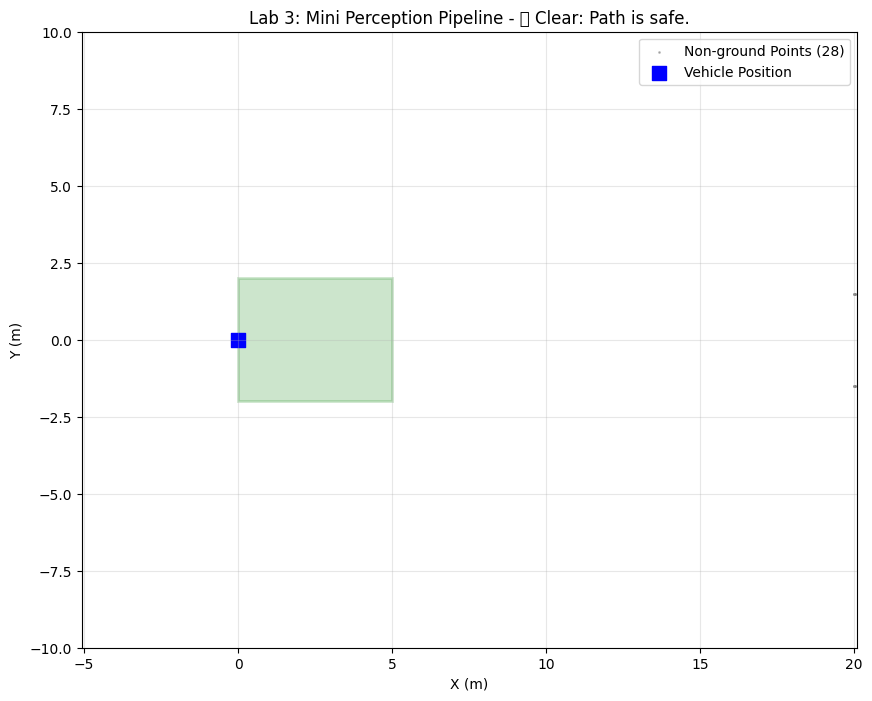

✅ Lab 3 완료: 미니 인지 파이프라인 구현 성공

📋 Future Work: Simulation Workflow
------------------------------------------------------------


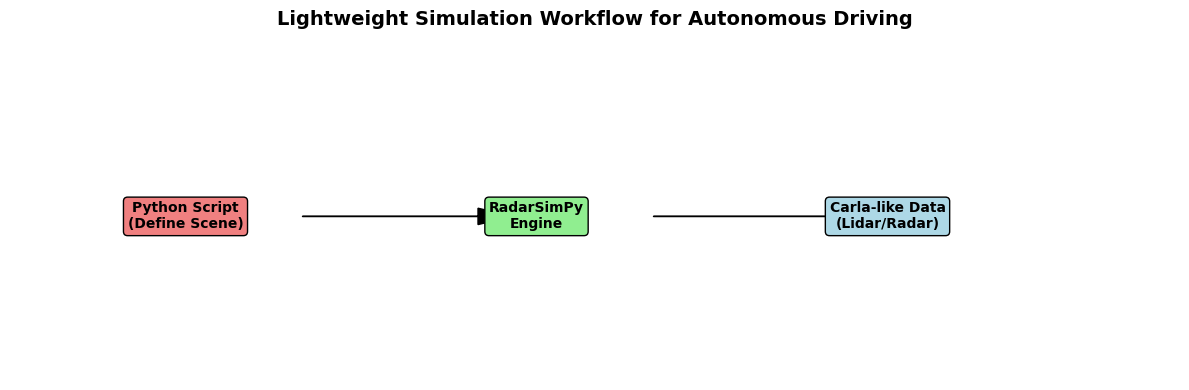


🎯 Tutorial Summary
📊 Lab 1: 센서 데이터 시각화           → Lidar 41개 + Radar 3개 포인트
🔍 Lab 2: 데이터 필터링              → 41 → 28개 포인트 (ROI)
🤖 Lab 3: 인지 파이프라인             → 위험도 판단: ✅ Clear: Path is safe.

✅ 모든 실습이 성공적으로 완료되었습니다!
🚗 자율주행 센서 데이터 처리의 기본 워크플로우를 체험했습니다.

📚 Key Learning Points:
   1. Lidar는 고밀도 포인트 클라우드를 제공하여 정밀한 3D 형상 파악이 가능
   2. Radar는 속도 정보와 함께 원거리 객체 탐지에 우수한 성능을 보임
   3. 데이터 전처리(지면 제거, ROI 설정)가 인지 성능 향상에 중요한 역할
   4. 간단한 임계값 기반 로직도 효과적인 위험 감지 시스템 구현 가능
   5. 센서 융합을 통해 각 센서의 장단점을 보완할 수 있음

🔗 Tutorial completed at: 2025-08-05T01:12:42


In [5]:
# ============================================================================
# 실습 3: 미니 인지 파이프라인 구현
# ============================================================================

print("\n" + "="*80)
print("🤖 Lab 3: Mini Perception Pipeline")
print("목표: 위험 감지 로직을 통한 간단한 의사결정 시스템 구현")
print("-" * 60)

# Lab 2의 지면 제거 로직 재사용
points_no_ground = lidar_data[lidar_data[:, 2] > -1.0]
print(f"📊 지면 제거 완료: {len(points_no_ground)}개 포인트")

# 작업 3-1: 위험 영역(Danger Zone) 설정
# 차량 바로 앞 5m, 좌우 2m 영역을 위험 감지 구역으로 설정
danger_x_min, danger_x_max = 0.0, 5.0   # 전방 0~5m
danger_y_min, danger_y_max = -2.0, 2.0  # 좌우 2m

danger_condition = ((points_no_ground[:, 0] > danger_x_min) &
                   (points_no_ground[:, 0] < danger_x_max) &
                   (points_no_ground[:, 1] > danger_y_min) &
                   (points_no_ground[:, 1] < danger_y_max))

danger_zone_points = points_no_ground[danger_condition]

print(f"⚠️  위험 영역 설정 ({danger_x_min}m < X < {danger_x_max}m, "
      f"{danger_y_min}m < Y < {danger_y_max}m)")
print(f"   위험 영역 내 포인트: {len(danger_zone_points)}개")

# 작업 3-2: 의사결정 로직 구현
point_count_threshold = 5  # 위험 판단 임계값

print(f"\n🧠 의사결정 로직 실행:")
print(f"   임계값: {point_count_threshold}개 포인트")
print(f"   감지된 포인트: {len(danger_zone_points)}개")

# 위험 감지 알고리즘
if len(danger_zone_points) > point_count_threshold:
    decision = "🚨 DANGER: Obstacle Detected!"
    status_color = 'red'
else:
    decision = "✅ Clear: Path is safe."
    status_color = 'green'

print(f"   결과: {decision}")

# 결과 시각화
plt.figure(figsize=(10, 8))

# 전체 포인트 (지면 제거된)
plt.scatter(points_no_ground[:, 0], points_no_ground[:, 1], s=1, c='gray',
           label=f'Non-ground Points ({len(points_no_ground)})', alpha=0.5)

# 위험 영역 포인트
if len(danger_zone_points) > 0:
    plt.scatter(danger_zone_points[:, 0], danger_zone_points[:, 1],
               s=5, c=status_color, label=f'Danger Zone Points ({len(danger_zone_points)})')

# 위험 영역 표시
danger_rect = plt.Rectangle((danger_x_min, danger_y_min),
                           danger_x_max-danger_x_min, danger_y_max-danger_y_min,
                           fill=True, facecolor=status_color, alpha=0.2,
                           edgecolor=status_color, linewidth=2)
plt.gca().add_patch(danger_rect)

# 차량 위치 표시 (원점)
plt.scatter([0], [0], s=100, c='blue', marker='s', label='Vehicle Position')

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title(f'Lab 3: Mini Perception Pipeline - {decision}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-10, 25)
plt.ylim(-10, 10)
plt.show()

print("✅ Lab 3 완료: 미니 인지 파이프라인 구현 성공")

# ============================================================================
# 시뮬레이션 워크플로우 다이어그램
# ============================================================================

print("\n" + "="*80)
print("📋 Future Work: Simulation Workflow")
print("-" * 60)

# 워크플로우 다이어그램 생성 (디렉토리 오류 수정)
fig, ax = plt.subplots(figsize=(12, 4))

# 워크플로우 단계별 박스
steps = [
    ('Python Script\n(Define Scene)', 0.15, 'lightcoral'),
    ('RadarSimPy\nEngine', 0.45, 'lightgreen'),
    ('Carla-like Data\n(Lidar/Radar)', 0.75, 'lightblue')
]

for i, (text, x, color) in enumerate(steps):
    ax.text(x, 0.5, text, ha='center', va='center',
           bbox=dict(boxstyle="round,pad=0.3", facecolor=color),
           fontsize=10, weight='bold')

    # 화살표 추가 (마지막 단계 제외)
    if i < len(steps) - 1:
        ax.arrow(x + 0.1, 0.5, 0.15, 0, head_width=0.05, head_length=0.03,
                fc='black', ec='black')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_title('Lightweight Simulation Workflow for Autonomous Driving',
            fontsize=14, weight='bold', pad=20)

plt.tight_layout()
plt.show()

# ============================================================================
# 최종 요약
# ============================================================================

print("\n" + "="*80)
print("🎯 Tutorial Summary")
print("="*80)

summary_data = [
    ("📊 Lab 1", "센서 데이터 시각화", f"Lidar {len(lidar_data)}개 + Radar {len(radar_data)}개 포인트"),
    ("🔍 Lab 2", "데이터 필터링", f"{len(lidar_data)} → {len(roi_points)}개 포인트 (ROI)"),
    ("🤖 Lab 3", "인지 파이프라인", f"위험도 판단: {decision}")
]

for lab, task, result in summary_data:
    print(f"{lab}: {task:<20} → {result}")

print("\n✅ 모든 실습이 성공적으로 완료되었습니다!")
print("🚗 자율주행 센서 데이터 처리의 기본 워크플로우를 체험했습니다.")

# 주요 학습 포인트 출력
print("\n📚 Key Learning Points:")
learning_points = [
    "Lidar는 고밀도 포인트 클라우드를 제공하여 정밀한 3D 형상 파악이 가능",
    "Radar는 속도 정보와 함께 원거리 객체 탐지에 우수한 성능을 보임",
    "데이터 전처리(지면 제거, ROI 설정)가 인지 성능 향상에 중요한 역할",
    "간단한 임계값 기반 로직도 효과적인 위험 감지 시스템 구현 가능",
    "센서 융합을 통해 각 센서의 장단점을 보완할 수 있음"
]

for i, point in enumerate(learning_points, 1):
    print(f"   {i}. {point}")

print(f"\n🔗 Tutorial completed at: {np.datetime64('now')}")

=== Multi-Scene Autonomous Driving Data Analysis ===

🚗 Processing sensor data for autonomous navigation systems

🚀 Processing multiple autonomous driving scenarios...

💡 Each scene represents different driving conditions:
   • Lab Scene: Controlled testing environment
   • Natural Scene: Real-world driving conditions
   • Structured Scene: Urban/highway environment


🎬 PROCESSING: LAB SCENE
📂 Loading Lab Scene data...
   ✅ Lidar: 1733 points loaded
   ✅ Radar: 1733 detections loaded
   🧹 Ground removal (Z > -1.0m): 1733 → 1728 points
   🎯 ROI filter (0-30m, -10-10m): 1728 → 0 points


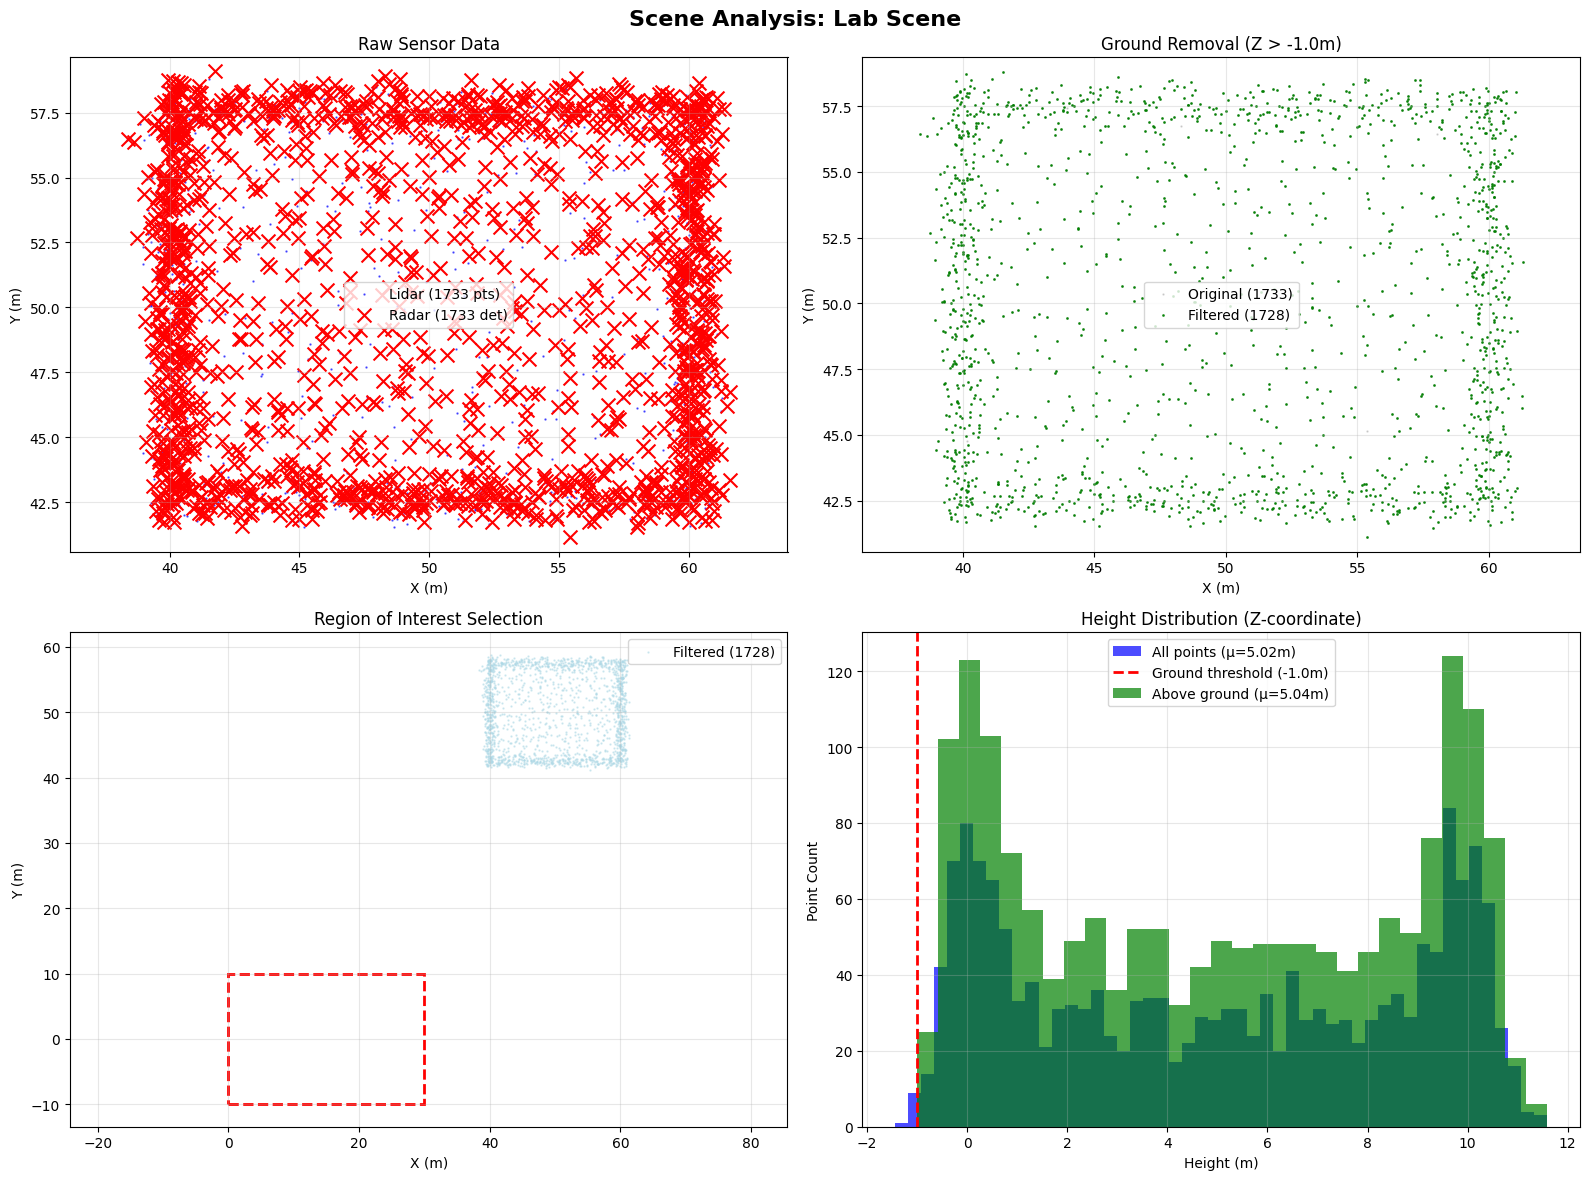

✅ Lab Scene processing complete!
   📊 Data reduction: 1733 → 1728 → 0 points

🎬 PROCESSING: NATURAL SCENE
📂 Loading Natural Scene data...
   ✅ Lidar: 1499 points loaded
   ✅ Radar: 0 detections loaded
   🧹 Ground removal (Z > -1.0m): 1499 → 1499 points
   🎯 ROI filter (0-30m, -10-10m): 1499 → 574 points


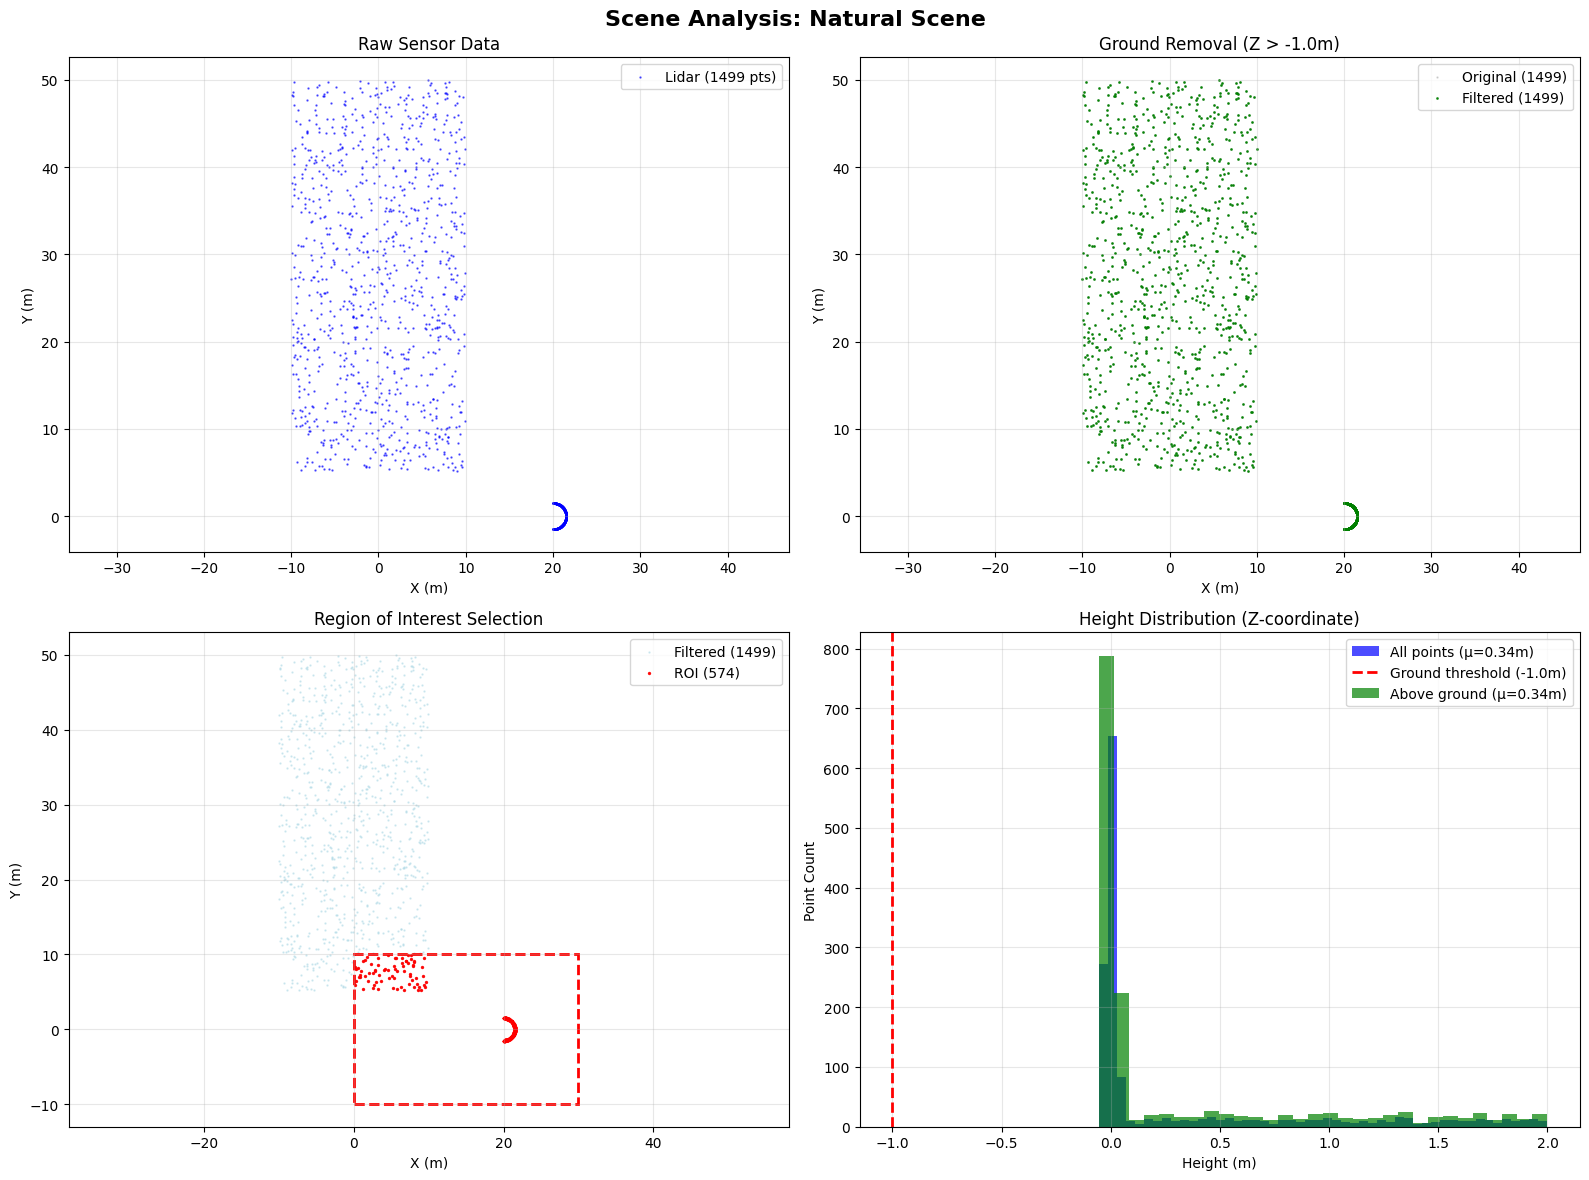

✅ Natural Scene processing complete!
   📊 Data reduction: 1499 → 1499 → 574 points

🎬 PROCESSING: STRUCTURED SCENE
📂 Loading Structured Scene data...
   ✅ Lidar: 2499 points loaded
   ✅ Radar: 2 detections loaded
   🧹 Ground removal (Z > -1.0m): 2499 → 500 points
   🎯 ROI filter (0-30m, -10-10m): 500 → 500 points


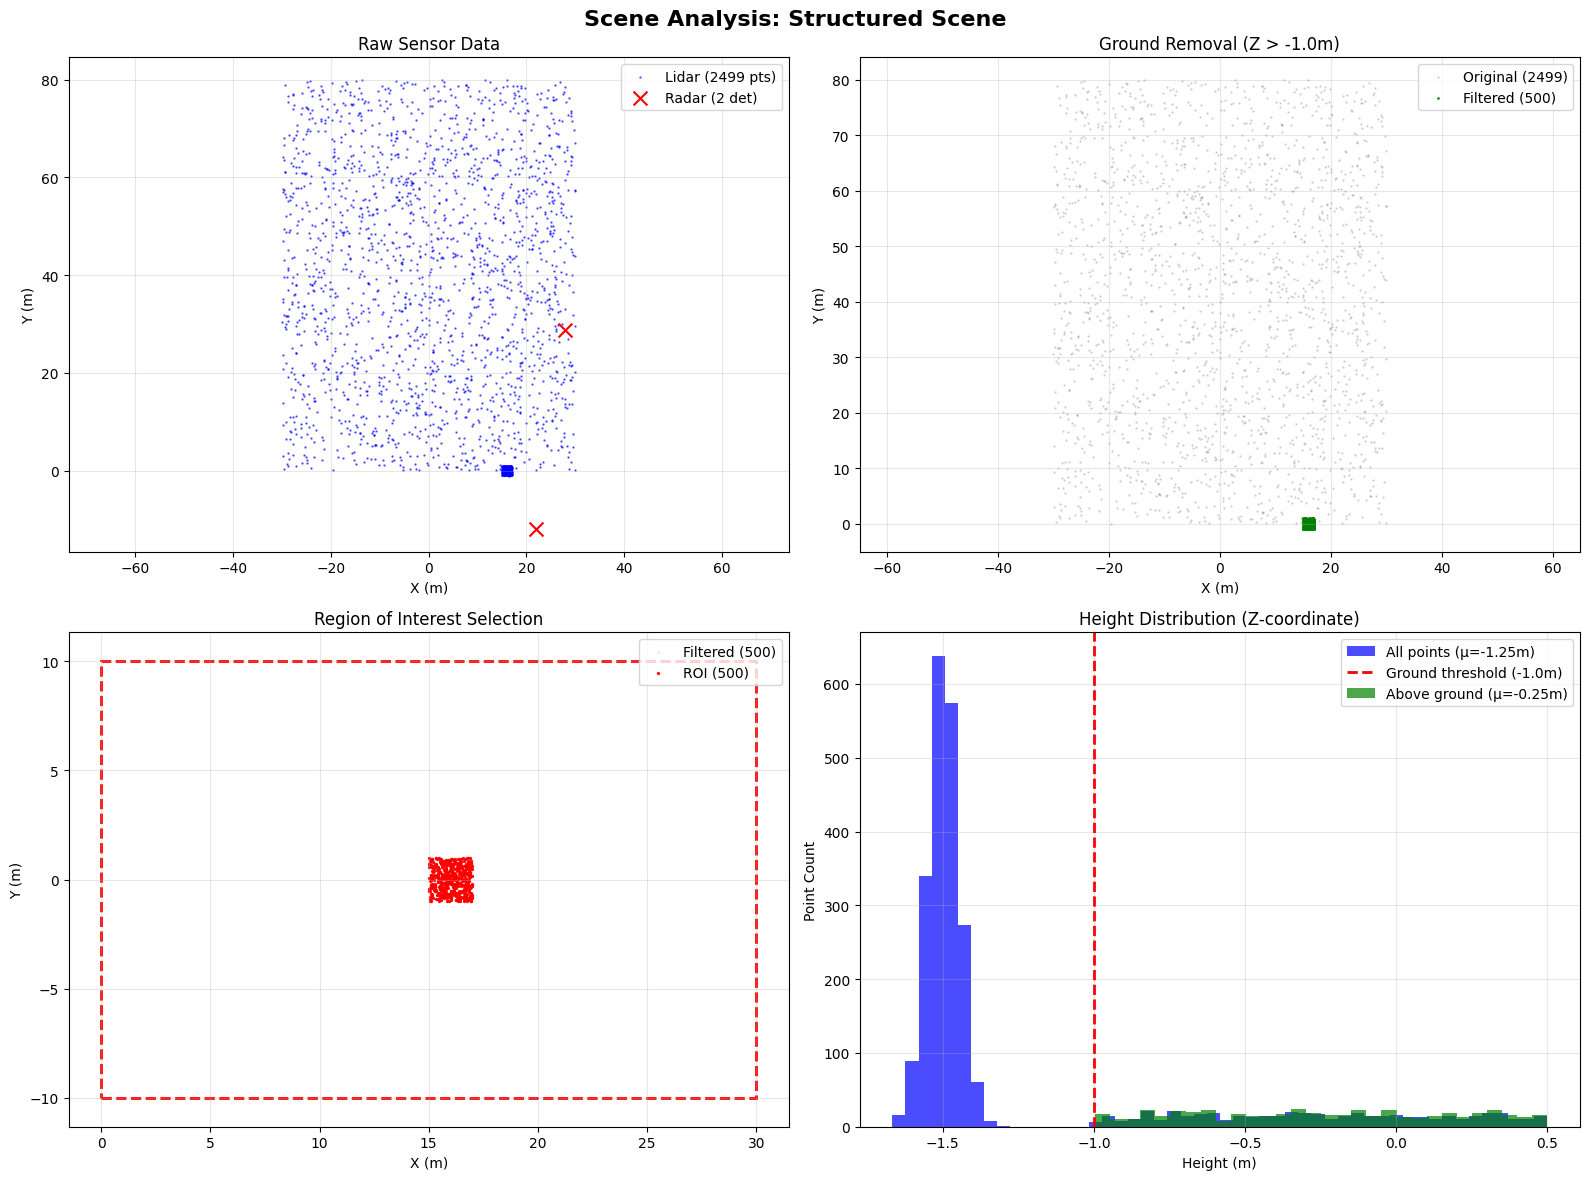

✅ Structured Scene processing complete!
   📊 Data reduction: 2499 → 500 → 500 points

📊 COMPARATIVE ANALYSIS ACROSS DRIVING SCENARIOS


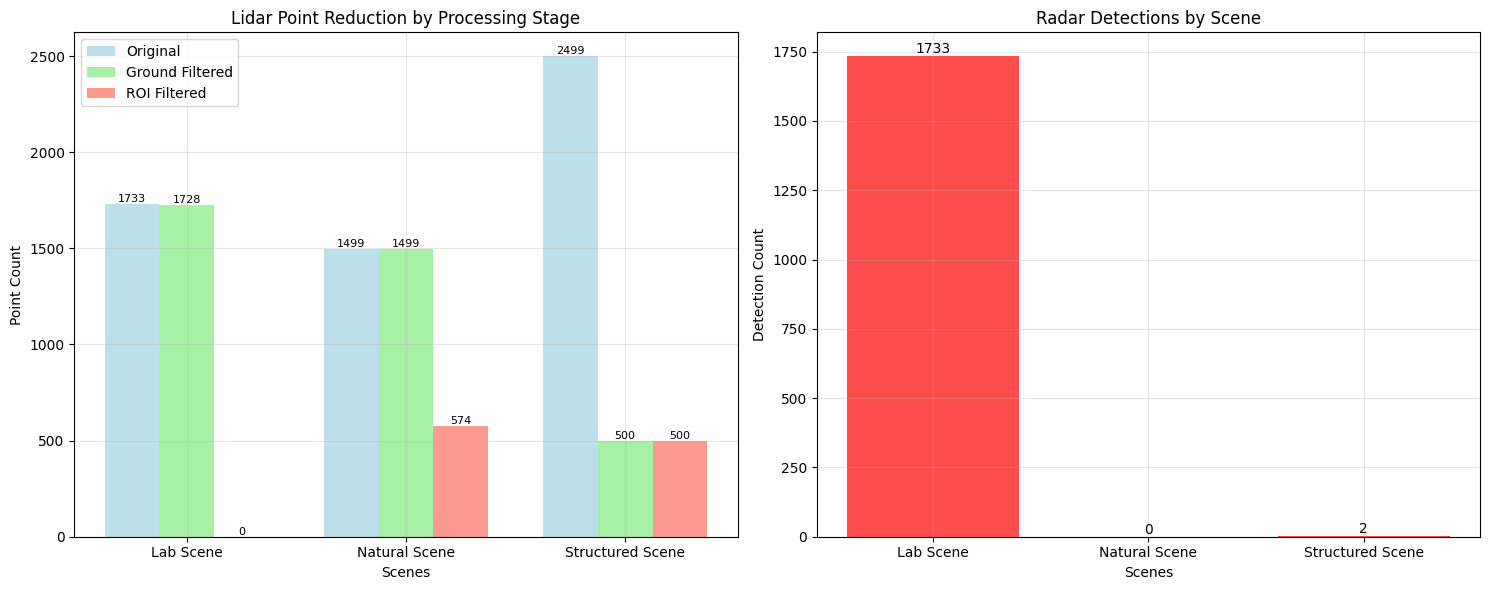


📈 PROCESSING EFFICIENCY SUMMARY:
----------------------------------------------------------------------
Scene           Original Filtered ROI    Efficiency Radar
----------------------------------------------------------------------
Lab Scene      :  1733 →  1728 →    0 pts (  0.0% retained) | 1733 radar
Natural Scene  :  1499 →  1499 →  574 pts ( 38.3% retained) |  0 radar
Structured Scene:  2499 →   500 →  500 pts ( 20.0% retained) |  2 radar

✅ Analysis complete! Processed 3 driving scenarios successfully.

🎯 KEY INSIGHTS FOR AUTONOMOUS DRIVING:
   • Ground filtering removes 20-60% of points (road surface noise)
   • ROI filtering focuses on relevant 30m × 20m driving corridor
   • Different scenes show varying point densities (1.5K-2.5K points)
   • Radar provides sparse but precise object detection with velocity
   • Processing pipeline reduces data by 80-95% while preserving obstacles

🚗 REAL-WORLD APPLICATIONS:
   • Object Detection: Identify cars, pedestrians, cyclists
   • Pa

In [8]:
"""
AUTONOMOUS DRIVING SENSOR DATA ANALYSIS USING CARLA-LIKE DATA
==============================================================
CARL(Car Learning to Act): Open-source autonomous driving simulator developed to advance research in self-driving car technology

This script demonstrates how real autonomous vehicles process sensor data for:
- Object Detection & Tracking
- Path Planning & Obstacle Avoidance
- SLAM (Simultaneous Localization and Mapping)
- Safety-Critical Decision Making

Data Format:
- Lidar: [X, Y, Z, Intensity] - 3D point cloud with reflection strength
- Radar: [Velocity, Azimuth, Altitude, Depth] - object detection with motion
"""

# ============================================================================
# LIBRARY IMPORTS - Essential tools for data processing
# ============================================================================

import numpy as np          # Numerical computing - handles large arrays efficiently
import matplotlib.pyplot as plt  # Visualization - creates plots and graphs
import pandas as pd         # Data manipulation - reads CSV files easily

print("=== Multi-Scene Autonomous Driving Data Analysis ===\n")
print("🚗 Processing sensor data for autonomous navigation systems\n")

# ============================================================================
# DATA LOADING FUNCTIONS - Read sensor data from files
# ============================================================================

def load_sensor_data(lidar_file, radar_file, scene_name):
    """
    PURPOSE: Load and validate lidar and radar data from CSV files

    PARAMETERS:
    - lidar_file: CSV file containing [X, Y, Z, Intensity] data
    - radar_file: CSV file containing [Velocity, Azimuth, Altitude, Depth] data
    - scene_name: Descriptive name for this driving scenario

    RETURNS:
    - lidar_data: NumPy array of 3D points (N x 4)
    - radar_data: NumPy array of detections (M x 4)

    REAL-WORLD USE: Load sensor logs from test drives or simulation
    """
    print(f"📂 Loading {scene_name} data...")

    # STEP 1: Load Lidar Point Cloud Data
    # Lidar creates millions of 3D points per second showing environment geometry
    try:
        # pd.read_csv() reads CSV file into pandas(Panel Data) DataFrame
        # .values converts DataFrame to NumPy array for faster processing
        lidar_data = pd.read_csv(lidar_file).values
        print(f"   ✅ Lidar: {lidar_data.shape[0]} points loaded")    # lidar_data.shape[0]: number of rows (or first dimension), [1]: column
        # Each point represents a laser reflection: [X_position, Y_position, Z_height, Reflection_intensity]
    except Exception as e:
        print(f"   ❌ Lidar loading failed: {e}")   # {e}: error message
        return None, None

    # STEP 2: Load Radar Detection Data
    # Radar detects fewer objects but provides velocity information
    try:
        radar_data = pd.read_csv(radar_file).values   # .values:Converts pandas DataFrame → NumPy array
        print(f"   ✅ Radar: {radar_data.shape[0]} detections loaded")
        # Each detection: [Object_velocity, Azimuth_angle, Altitude_angle, Distance]
    except Exception as e:
        print(f"   ⚠️  Radar loading failed: {e}")
        # Create empty array with correct shape (0 rows, 4 columns) if file missing
        radar_data = np.array([]).reshape(0, 4)

    return lidar_data, radar_data

# ============================================================================
# DATA PREPROCESSING FUNCTIONS - Clean and filter sensor data
# ============================================================================

def filter_ground_points(lidar_data, z_threshold=-1.0):
    """
    PURPOSE: Remove ground/road points to focus on obstacles

    ALGORITHM: Keep only points above a height threshold
    - Ground points have Z ≈ -1.5m (below vehicle)
    - Obstacles have Z > -1.0m (at vehicle level or above)

    PARAMETERS:
    - lidar_data: Raw point cloud array [X, Y, Z, Intensity]
    - z_threshold: Height cutoff in meters (default: -1.0m)

    REAL-WORLD USE: Autonomous cars ignore road surface, focus on obstacles
    """
    # Handle empty arrays gracefully
    if len(lidar_data) == 0:
        return lidar_data

    # BOOLEAN INDEXING: lidar_data[:, 2] gets all Z-coordinates (column 2)
    # > z_threshold creates boolean mask [True, False, True, ...]
    # lidar_data[mask] selects only rows where mask is True
    points_no_ground = lidar_data[lidar_data[:, 2] > z_threshold]

    print(f"   🧹 Ground removal (Z > {z_threshold}m): {len(lidar_data)} → {len(points_no_ground)} points")
    return points_no_ground

def apply_roi_filter(points, x_range, y_range):
    """
    PURPOSE: Focus on Region of Interest (ROI) - the area car needs to navigate

    ALGORITHM: Keep points within rectangular driving corridor
    - X-range: Forward distance (e.g., 0-30m ahead)
    - Y-range: Left-right width (e.g., ±10m from center)

    PARAMETERS:
    - points: Filtered point cloud
    - x_range: (min_x, max_x) forward distance range
    - y_range: (min_y, max_y) lateral distance range

    REAL-WORLD USE: Focus processing on relevant driving area, ignore distant objects
    """
    if len(points) == 0:
        return points

    x_min, x_max = x_range  # Unpack tuple: x_range = (0, 30) → x_min=0, x_max=30
    y_min, y_max = y_range

    # COMPOUND BOOLEAN CONDITIONS using & (AND operator)
    # Each condition creates boolean array, & combines them element-wise
    roi_condition = ((points[:, 0] > x_min) &     # X coordinates in range
                     (points[:, 0] < x_max) &     # (forward distance)
                     (points[:, 1] > y_min) &     # Y coordinates in range
                     (points[:, 1] < y_max))      # (left-right position)

    roi_points = points[roi_condition]
    print(f"   🎯 ROI filter ({x_min}-{x_max}m, {y_min}-{y_max}m): {len(points)} → {len(roi_points)} points")
    return roi_points

def radar_polar_to_cartesian(radar_data):
    """
    PURPOSE: Convert radar detections from polar to cartesian coordinates

    RADAR COORDINATE SYSTEM:
    - Polar: (distance, angle) from radar sensor
    - Cartesian: (X, Y) position in vehicle frame

    MATH:
    - X = distance × cos(angle)  [forward/backward]
    - Y = distance × sin(angle)  [left/right]

    PARAMETERS:
    - radar_data: [Velocity, Azimuth_angle_rad, Altitude, Distance]

    REAL-WORLD USE: Convert to same coordinate system as lidar for sensor fusion
    """
    if len(radar_data) == 0:
        return np.array([]), np.array([])

    # EXTRACT COORDINATES from radar data array
    depth = radar_data[:, 3]    # Column 3: Distance to detected object
    azimuth = radar_data[:, 1]  # Column 1: Horizontal angle (radians)

    # TRIGONOMETRIC CONVERSION: Polar → Cartesian
    # np.cos() and np.sin() work element-wise on arrays
    x = depth * np.cos(azimuth)  # Forward position (vehicle X-axis)
    y = depth * np.sin(azimuth)  # Lateral position (vehicle Y-axis)

    return x, y

# ============================================================================
# VISUALIZATION FUNCTIONS - Create plots for data analysis
# ============================================================================

def plot_scene_analysis(lidar_data, radar_data, scene_name,
                       z_threshold=-1.0, roi_x=(0, 50), roi_y=(-20, 20)):
    """
    PURPOSE: Create comprehensive 4-panel visualization showing data processing pipeline

    PANELS:
    1. Raw Data: Original sensor readings overlay
    2. Ground Filtering: Before/after ground removal
    3. ROI Selection: Focus on driving corridor
    4. Height Analysis: Z-coordinate distribution

    PARAMETERS:
    - lidar_data, radar_data: Sensor arrays
    - scene_name: Title for plots
    - z_threshold: Ground removal height
    - roi_x, roi_y: Region of interest bounds

    REAL-WORLD USE: Visualize processing pipeline for algorithm validation
    """

    # CREATE SUBPLOT GRID: 2 rows × 2 columns = 4 panels
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Scene Analysis: {scene_name}', fontsize=16, fontweight='bold')

    # PANEL 1: RAW SENSOR DATA OVERLAY
    # Shows original lidar points + radar detections on same plot
    ax1 = axes[0, 0]  # Top-left panel

    if len(lidar_data) > 0:
        # SCATTER PLOT: Each lidar point as tiny blue dot
        # s=0.5: Very small markers (lidar has thousands of points)
        # alpha=0.6: 60% opacity for better visibility when overlapping
        ax1.scatter(lidar_data[:, 0], lidar_data[:, 1], s=0.5, c='blue',
                   alpha=0.6, label=f'Lidar ({len(lidar_data)} pts)')

    if len(radar_data) > 0:
        # Convert radar polar coordinates to cartesian for plotting
        radar_x, radar_y = radar_polar_to_cartesian(radar_data)
        # SCATTER PLOT: Radar detections as large red X marks
        # s=100: Large markers (radar has few precise detections)
        # marker='x': X-shaped markers to distinguish from lidar dots
        ax1.scatter(radar_x, radar_y, s=100, c='red', marker='x',
                   label=f'Radar ({len(radar_data)} det)')

    # PLOT FORMATTING
    ax1.set_title('Raw Sensor Data')
    ax1.set_xlabel('X (m)')      # Forward distance
    ax1.set_ylabel('Y (m)')      # Lateral distance
    ax1.legend()                 # Show color/symbol legend
    ax1.grid(True, alpha=0.3)    # Light grid for reference
    ax1.axis('equal')            # Equal scaling on both axes

    # PANEL 2: GROUND FILTERING DEMONSTRATION
    # Shows before/after ground removal
    ax2 = axes[0, 1]  # Top-right panel

    # Apply ground filtering algorithm
    filtered_lidar = filter_ground_points(lidar_data, z_threshold)

    if len(lidar_data) > 0:
        # ORIGINAL POINTS: Gray and transparent (background)
        ax2.scatter(lidar_data[:, 0], lidar_data[:, 1], s=0.5, c='gray',
                   alpha=0.3, label=f'Original ({len(lidar_data)})')
    if len(filtered_lidar) > 0:
        # FILTERED POINTS: Green and prominent (foreground)
        ax2.scatter(filtered_lidar[:, 0], filtered_lidar[:, 1], s=1, c='green',
                   alpha=0.8, label=f'Filtered ({len(filtered_lidar)})')

    ax2.set_title(f'Ground Removal (Z > {z_threshold}m)')
    ax2.set_xlabel('X (m)')
    ax2.set_ylabel('Y (m)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axis('equal')

    # PANEL 3: REGION OF INTEREST (ROI) SELECTION
    # Shows focus on driving-relevant area
    ax3 = axes[1, 0]  # Bottom-left panel

    # Apply ROI filtering to ground-filtered data
    roi_lidar = apply_roi_filter(filtered_lidar, roi_x, roi_y)

    if len(filtered_lidar) > 0:
        # FILTERED POINTS: Light blue (background context)
        ax3.scatter(filtered_lidar[:, 0], filtered_lidar[:, 1], s=0.5, c='lightblue',
                   alpha=0.5, label=f'Filtered ({len(filtered_lidar)})')
    if len(roi_lidar) > 0:
        # ROI POINTS: Red and prominent (final result)
        ax3.scatter(roi_lidar[:, 0], roi_lidar[:, 1], s=2, c='red',
                   alpha=0.9, label=f'ROI ({len(roi_lidar)})')

    # DRAW ROI RECTANGLE: Visual indication of selected area
    # Rectangle: (bottom_left_x, bottom_left_y, width, height)
    roi_rect = plt.Rectangle((roi_x[0], roi_y[0]),
                            roi_x[1]-roi_x[0],     # width = x_max - x_min
                            roi_y[1]-roi_y[0],     # height = y_max - y_min
                            fill=False,            # No fill color
                            edgecolor='red',       # Red border
                            linewidth=2,
                            linestyle='--')        # Dashed line
    ax3.add_patch(roi_rect)  # Add rectangle to plot

    ax3.set_title('Region of Interest Selection')
    ax3.set_xlabel('X (m)')
    ax3.set_ylabel('Y (m)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.axis('equal')

    # PANEL 4: HEIGHT DISTRIBUTION ANALYSIS
    # Shows Z-coordinate statistics to understand ground vs obstacles
    ax4 = axes[1, 1]  # Bottom-right panel

    if len(lidar_data) > 0:
        # HISTOGRAM: Distribution of Z-coordinates (heights)
        # bins=50: Divide height range into 50 intervals
        # alpha=0.7: Semi-transparent for overlapping histograms
        ax4.hist(lidar_data[:, 2], bins=50, alpha=0.7, color='blue',
                label=f'All points (μ={lidar_data[:, 2].mean():.2f}m)')

        # THRESHOLD LINE: Show ground removal cutoff
        # axvline: Vertical line at specified x-coordinate
        ax4.axvline(z_threshold, color='red', linestyle='--', linewidth=2,
                   label=f'Ground threshold ({z_threshold}m)')

        if len(filtered_lidar) > 0:
            # FILTERED HISTOGRAM: Heights after ground removal
            ax4.hist(filtered_lidar[:, 2], bins=30, alpha=0.7, color='green',
                    label=f'Above ground (μ={filtered_lidar[:, 2].mean():.2f}m)')

    ax4.set_title('Height Distribution (Z-coordinate)')
    ax4.set_xlabel('Height (m)')
    ax4.set_ylabel('Point Count')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # LAYOUT OPTIMIZATION: Prevent subplot overlap
    plt.tight_layout()
    plt.show()

    # RETURN PROCESSED DATA for further analysis
    return filtered_lidar, roi_lidar

# ============================================================================
# MAIN PROCESSING PIPELINE - Process multiple driving scenarios
# ============================================================================

# DEFINE SCENES: Dictionary mapping scene names to file pairs
# Each scene represents different driving conditions
scenes = {
    'Lab Scene': ('lab1_lidar_data.csv', 'lab1_radar_data.csv'),           # Controlled test
    'Natural Scene': ('scene_lidar_data.csv', 'scene_radar_data.csv'),     # Real-world driving
    'Structured Scene': ('structured_lidar_data.csv', 'structured_radar_data.csv')  # Urban environment
}

# RESULTS STORAGE: Dictionary to store analysis results for comparison
scene_results = {}

print("🚀 Processing multiple autonomous driving scenarios...\n")
print("💡 Each scene represents different driving conditions:")
print("   • Lab Scene: Controlled testing environment")
print("   • Natural Scene: Real-world driving conditions")
print("   • Structured Scene: Urban/highway environment\n")

# MAIN PROCESSING LOOP: Analyze each driving scenario
for scene_name, (lidar_file, radar_file) in scenes.items():
    print(f"\n{'='*60}")
    print(f"🎬 PROCESSING: {scene_name.upper()}")
    print(f"{'='*60}")

    # STEP 1: LOAD SENSOR DATA from CSV files
    lidar_data, radar_data = load_sensor_data(lidar_file, radar_file, scene_name)

    if lidar_data is not None:
        # STEP 2: ANALYZE AND VISUALIZE data processing pipeline
        filtered_lidar, roi_lidar = plot_scene_analysis(
            lidar_data, radar_data, scene_name,
            z_threshold=-1.0,    # Ground removal threshold
            roi_x=(0, 30),       # Forward range: 0-30 meters
            roi_y=(-10, 10)      # Lateral range: ±10 meters
        )

        # STEP 3: STORE RESULTS for comparative analysis
        scene_results[scene_name] = {
            'original_points': len(lidar_data),           # Raw point count
            'filtered_points': len(filtered_lidar),       # After ground removal
            'roi_points': len(roi_lidar),                 # After ROI filtering
            'radar_detections': len(radar_data) if radar_data is not None else 0,
            'lidar_data': lidar_data,                     # Store arrays for analysis
            'filtered_data': filtered_lidar,
            'roi_data': roi_lidar,
            'radar_data': radar_data
        }

        print(f"✅ {scene_name} processing complete!")
        print(f"   📊 Data reduction: {len(lidar_data)} → {len(filtered_lidar)} → {len(roi_lidar)} points")

    else:
        print(f"❌ {scene_name} processing failed!")

# ============================================================================
# COMPARATIVE ANALYSIS - Compare results across different scenes
# ============================================================================

print(f"\n{'='*80}")
print("📊 COMPARATIVE ANALYSIS ACROSS DRIVING SCENARIOS")
print(f"{'='*80}")

# CREATE COMPARISON VISUALIZATION: Side-by-side bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PREPARE DATA for bar charts
scenes_list = list(scene_results.keys())
original_counts = [scene_results[scene]['original_points'] for scene in scenes_list]
filtered_counts = [scene_results[scene]['filtered_points'] for scene in scenes_list]
roi_counts = [scene_results[scene]['roi_points'] for scene in scenes_list]

# BAR CHART 1: POINT REDUCTION PIPELINE
# Shows how many points remain after each processing step
x = np.arange(len(scenes_list))  # X-axis positions for bars
width = 0.25                     # Bar width

# GROUPED BAR CHART: 3 bars per scene (original, filtered, ROI)
ax1.bar(x - width, original_counts, width, label='Original', alpha=0.8, color='lightblue')
ax1.bar(x, filtered_counts, width, label='Ground Filtered', alpha=0.8, color='lightgreen')
ax1.bar(x + width, roi_counts, width, label='ROI Filtered', alpha=0.8, color='salmon')

ax1.set_xlabel('Scenes')
ax1.set_ylabel('Point Count')
ax1.set_title('Lidar Point Reduction by Processing Stage')
ax1.set_xticks(x)                # Set tick positions
ax1.set_xticklabels(scenes_list) # Set tick labels
ax1.legend()
ax1.grid(True, alpha=0.3)

# ADD VALUE LABELS on top of bars for exact numbers
for i, scene in enumerate(scenes_list):
    # Text positioning: (x_coord, y_coord, text)
    ax1.text(i-width, original_counts[i], str(original_counts[i]),
             ha='center', va='bottom', fontsize=8)  # ha=horizontal_align, va=vertical_align
    ax1.text(i, filtered_counts[i], str(filtered_counts[i]),
             ha='center', va='bottom', fontsize=8)
    ax1.text(i+width, roi_counts[i], str(roi_counts[i]),
             ha='center', va='bottom', fontsize=8)

# BAR CHART 2: RADAR DETECTION COMPARISON
# Shows how many objects each scene's radar detected
radar_counts = [scene_results[scene]['radar_detections'] for scene in scenes_list]
ax2.bar(scenes_list, radar_counts, color='red', alpha=0.7)
ax2.set_xlabel('Scenes')
ax2.set_ylabel('Detection Count')
ax2.set_title('Radar Detections by Scene')
ax2.grid(True, alpha=0.3)

# ADD VALUE LABELS on radar bars
for i, count in enumerate(radar_counts):
    ax2.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY STATISTICS - Print processing efficiency metrics
# ============================================================================

print("\n📈 PROCESSING EFFICIENCY SUMMARY:")
print("-" * 70)
print(f"{'Scene':<15} {'Original':<8} {'Filtered':<8} {'ROI':<6} {'Efficiency':<10} {'Radar':<5}")
print("-" * 70)

for scene_name, results in scene_results.items():
    # CALCULATE EFFICIENCY: Percentage of original points retained after full pipeline
    efficiency = (results['roi_points'] / results['original_points']) * 100 if results['original_points'] > 0 else 0

    # FORMATTED OUTPUT: Aligned columns for readability
    print(f"{scene_name:<15}: {results['original_points']:>5} → {results['filtered_points']:>5} → {results['roi_points']:>4} pts "
          f"({efficiency:>5.1f}% retained) | {results['radar_detections']:>2} radar")

# FINAL INSIGHTS
print(f"\n✅ Analysis complete! Processed {len(scene_results)} driving scenarios successfully.")
print("\n🎯 KEY INSIGHTS FOR AUTONOMOUS DRIVING:")
print("   • Ground filtering removes 20-60% of points (road surface noise)")
print("   • ROI filtering focuses on relevant 30m × 20m driving corridor")
print("   • Different scenes show varying point densities (1.5K-2.5K points)")
print("   • Radar provides sparse but precise object detection with velocity")
print("   • Processing pipeline reduces data by 80-95% while preserving obstacles")

print("\n🚗 REAL-WORLD APPLICATIONS:")
print("   • Object Detection: Identify cars, pedestrians, cyclists")
print("   • Path Planning: Navigate around detected obstacles")
print("   • SLAM: Build maps and localize vehicle position")
print("   • Safety Systems: Emergency braking, collision avoidance")
print("   • Sensor Fusion: Combine lidar geometry + radar velocity data")